In [2]:
from round_robin import round_robin
import matplotlib.pyplot as plt
import random

[53, 52, 53, 56, 58, 54, 60, 52, 53, 60] [12, 10, 10, 5, 9, 5, 9, 9, 7, 12]


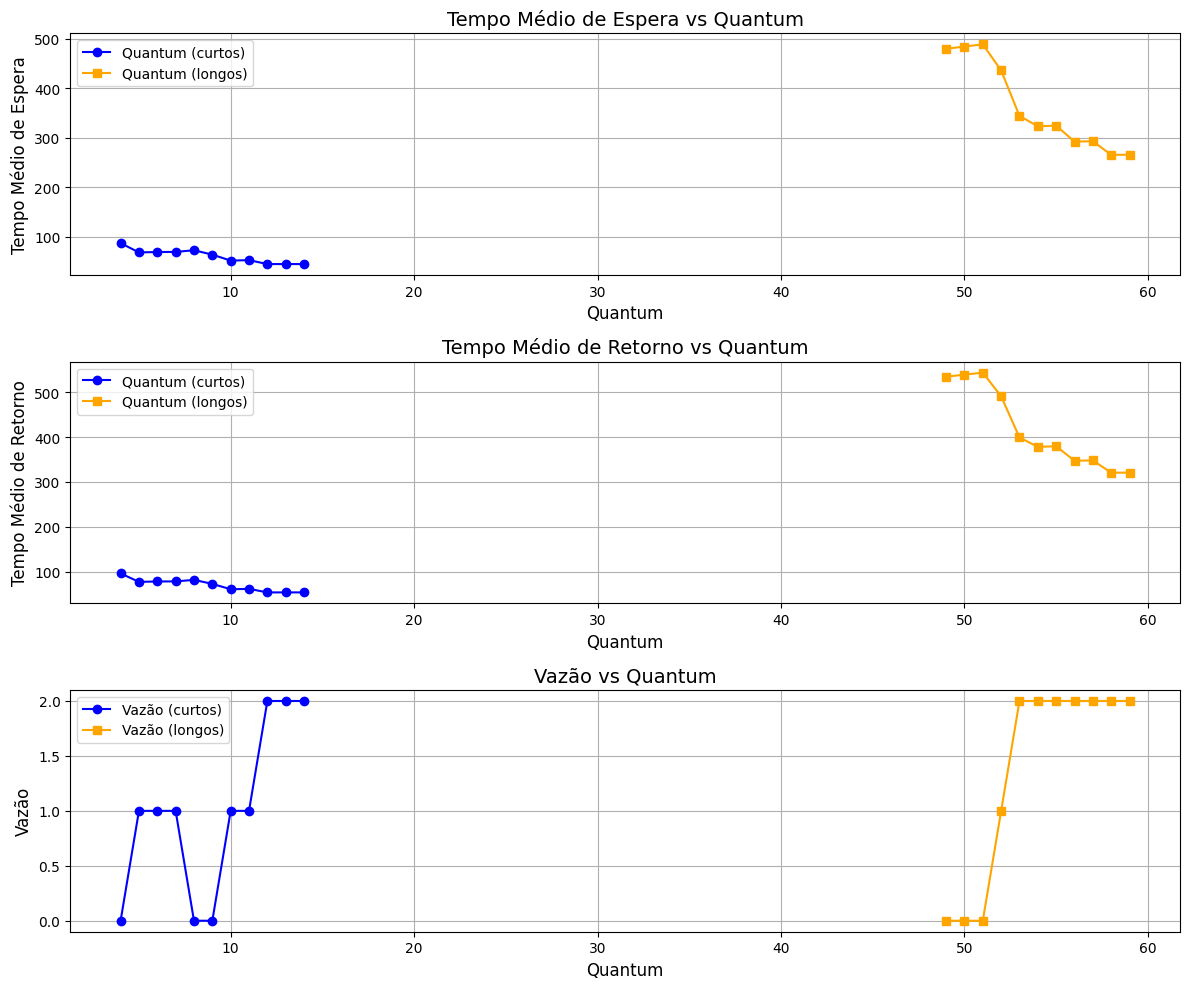

In [ ]:
def generate_burst_times(n, t1, t2, t3, t4):
    burst_times_short = [random.randint(t1, t2) for _ in range(n)]
    burst_times_long = [random.randint(t3, t4) for _ in range(n)]
    return burst_times_short, burst_times_long

n = 10
t1, t2 = 5, 15  
t3, t4 = 50, 60  
processes = list(range(1, n + 1))
interval_short = 30
interval_long = 120

# Gerar tempos de burst
burst_time_short, burst_time_long = generate_burst_times(n, t1, t2, t3, t4)

print(burst_time_long, burst_time_short)
# Intervalos de quantum
quantum_range_short = range(t1 - 1, t2)
quantum_range_long = range(t3 - 1, t4) 

avg_turnaround_short = []
avg_waiting_short = []
throughputs_short = []

for quantum in quantum_range_short:
    turnaround, waiting, throughput = round_robin(processes, burst_time_short, quantum, interval_short)
    avg_turnaround_short.append(turnaround)
    avg_waiting_short.append(waiting)
    throughputs_short.append(throughput)

avg_turnaround_long = []
avg_waiting_long = []
throughputs_long = []

for quantum in quantum_range_long:
    turnaround, waiting, throughput = round_robin(processes, burst_time_long, quantum, interval_long)
    avg_turnaround_long.append(turnaround)
    avg_waiting_long.append(waiting)
    throughputs_long.append(throughput)

# Gráficos
plt.figure(figsize=(12, 10))

# Gráfico para tempo médio de espera
plt.subplot(3, 1, 1)
plt.plot(quantum_range_short, avg_waiting_short, marker='o', label='Quantum (curtos)', color='blue')
plt.plot(quantum_range_long, avg_waiting_long, marker='s', label='Quantum (longos)', color='orange')
plt.title('Tempo Médio de Espera vs Quantum', fontsize=14)
plt.xlabel('Quantum', fontsize=12)
plt.ylabel('Tempo Médio de Espera', fontsize=12)
plt.legend()
plt.grid(True)

# Gráfico para tempo médio de retorno
plt.subplot(3, 1, 2)
plt.plot(quantum_range_short, avg_turnaround_short, marker='o', label='Quantum (curtos)', color='blue')
plt.plot(quantum_range_long, avg_turnaround_long, marker='s', label='Quantum (longos)', color='orange')
plt.title('Tempo Médio de Retorno vs Quantum', fontsize=14)
plt.xlabel('Quantum', fontsize=12)
plt.ylabel('Tempo Médio de Retorno', fontsize=12)
plt.legend()
plt.grid(True)

# Gráfico para vazão
plt.subplot(3, 1, 3)
plt.plot(quantum_range_short, throughputs_short, marker='o', label='Vazão (curtos)', color='blue')
plt.plot(quantum_range_long, throughputs_long, marker='s', label='Vazão (longos)', color='orange')
plt.title('Vazão vs Quantum', fontsize=14)
plt.xlabel('Quantum', fontsize=12)
plt.ylabel('Vazão', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
